<h1 style = "font-family: spantaran; font-size: 48px;">Starting with the <span style = "color:#0ddc76">basics</span></h1>

<h1 align = center style = "font-family: spantaran; font-size: 60px;"><span style = "color:#0ddc76">MNIST </span>using ANNs </h1>

<h1 style = "font-family: spantaran; font-size: 48px;"><span style = "color:#0ddc76">Importing MNIST</span> + a little history</h1> 

<ul style = "font-size:18px; font-family:Poppins;">
    <li>MNIST consists of black & white images of <span style = "text-decoration: skyblue solid underline;">28 x 28 pixels</span> each and a total of <b>70,000 images</b> (<span style = "text-decoration: skyblue solid underline;">60,000</span> for training and <span style = "text-decoration: skyblue solid underline;">10,000</span> for testing).</li> 
    <li>It was created by Yann LeCunn in <span style = "text-decoration: skyblue solid underline;">1988.</span></li>
    <li>It consists of digits from 0 - 9 taken from the US Postal Service.</li> 
    <li>It is known as the <span style = "text-decoration: skyblue solid underline;">'Hello World' into Deep Learning</span> as most practitioners begin with the MNIST dataset.</li>
</ul>  

<ul type = "square" style = "font-size:18px; font-family:Poppins;">
    <li>The tensorflow library has a bunch of datasets built-in that we can directly call in our code.</li>
    <li>They <span style = "text-decoration: skyblue solid underline;">don't need to be downloaded externally</span> from another source.</li>
    <li style = "margin-top:12px;">We can check the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/datasets">tf.keras.datasets</a> library to know more about the different datasets available.</li>
</ul> 

In [14]:
import numpy as np
import tensorflow as tf

MNIST = tf.keras.datasets.mnist

# check documentation on tf.keras.datasets.mnist to know about how to load the dataset. 

(x_train, y_train), (x_test, y_test) = MNIST.load_data()

# The x_train and x_test variables contain the actual pixel values for all 784 pixels in each image.
# While the y_train and y_test variables contain the corresponding digit from 0 - 9. 

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


<h1 style = "font-family: spantaran; font-size: 48px;">Data<span style = "color:#0ddc76"> Visualization</span></h1>

<p style = "font-size:18px; font-family:Poppins;">◈ As we can see, the dataset is in the form of <span style = "text-decoration: skyblue solid underline;">numpy</span> arrays. Let us see what happens when we print a <span style = "text-decoration: skyblue solid underline;">single 28 x 28 (2-d) array.</span></p>

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<p style = "font-size:18px; font-family:Poppins;">◈ This doesn't look anything like an image though, and we know that MNIST dataset consists of images of numbers from 0 - 9.</p>
<p style = "font-size:18px; font-family:Poppins;">◈ To plot these images, we will use the <span style = "text-decoration: skyblue solid underline;">matplotlib</span> library, which allows us to convert <span style = "text-decoration: skyblue solid underline;">arrays of pixel values</span> like above, into <span style = "text-decoration: skyblue solid underline;">images</span> that we can infer from easily.</p> 

<p style = "font-size:18px; font-family: Poppins;">❖ Visualizing the dataset by plotting 6 random images</p>

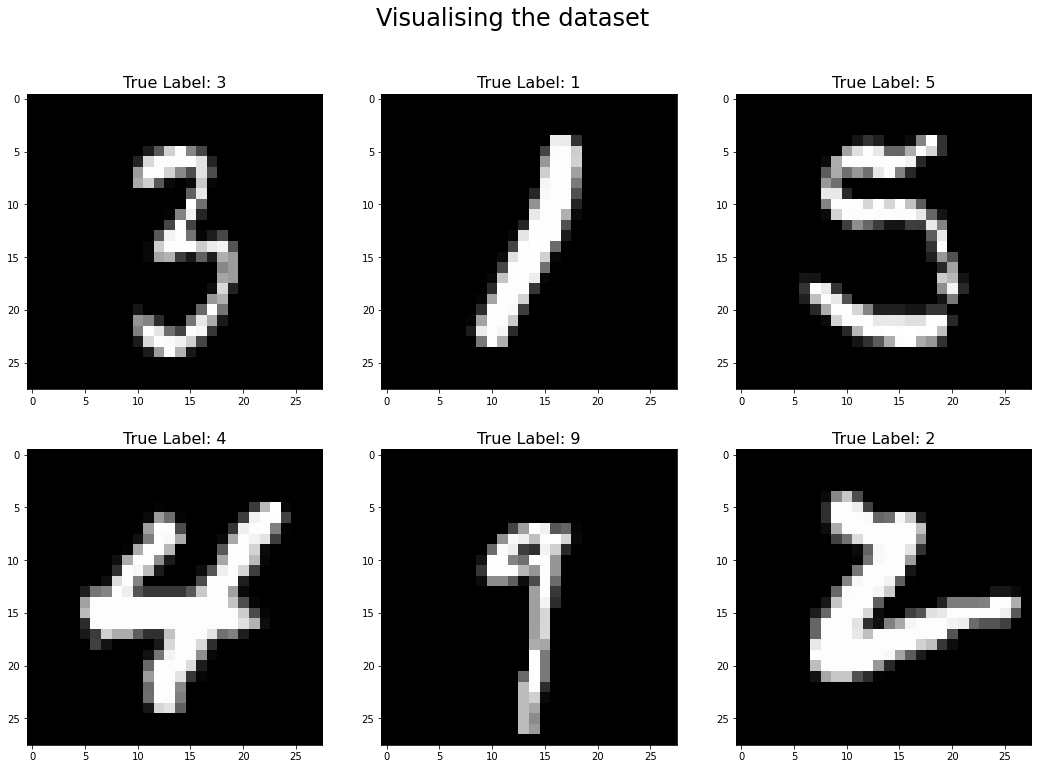

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, 60000)
        ax[i, j].imshow(x_train[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_train[index]}', fontsize=16)
        index += 1

plt.suptitle('Visualising the dataset', fontsize=24)
plt.show()

<p style = "font-size:18px; font-family:Poppins;">Here, we visualized the dataset by plotting their images using the <b>matplotlib</b> library.</p> 

<p style = "font-size:18px; font-family:Poppins;">The <span style = "text-decoration: palevioletred solid underline;">imshow()</span> function converts the numpy arrays that the images originally are, into their correct pixel values and creates their images.</p>

<h1 style = "font-family: spantaran; font-size: 48px;">Data<span style = "color:#0ddc76"> Transformation</span></h1>

<p style = "font-size:18px; font-family:Poppins;">◈ Now, we saw above while printing the numpy array that each image consists of pixel values from 0 - 255. And as we learned at the start of this workshop in Simple Linear Regression, <span style = "text-decoration: skyblue solid underline;">bigger values skew the results</span> towards their side even though they might not necessarily be more important.</p> 

<p style = "font-size:18px; font-family:Poppins;">◈ For example, in a 28 x 28 image of a digit, the <span style = "text-decoration: skyblue solid underline;">black</span> pixels surrounding the number <span style = "text-decoration: skyblue solid underline;">are also just as important</span> as the <span style = "text-decoration: skyblue solid underline;">white</span> pixels that make-up the number.</p>

<p style = "font-size:18px; font-family:Poppins;">◈ So, to counter this, we <span style = "text-decoration: skyblue solid underline;">transform</span> our data from pixel values of 0-255, to pixel values <span style = "text-decoration: skyblue solid underline;">scaled down</span> to 0-1.</p> 

In [17]:
x_train, x_test = x_train / 255.0, x_test / 255.0

<h1 style = "font-family: spantaran; font-size: 48px;"><span style = "color:#0ddc76">Model </span>Building</h1>

<p style = "font-size: 18px; font-family: Poppins;">◈ Now comes the most exciting part of the entire ML journey...drumroll🥁... Building the <span style = "color: #0ddc76;"><b>Artificial Neural Network (ANN)</span> Model</b> !!</p>

<ul type = "square" style = "font-size:18px; font-family:Poppins;">
<li style = "margin-bottom: 7px;">First, let's get over the jargon and syntax essential to build a model using tensorflow.</li>
<li style = "margin-bottom: 7px;">As we can see, building a deep learning model using tensorflow is not coding heavy at all.</li>
<li style = "margin-bottom: 30px;">Infact, this is the simplest way to build a deep learning network and the best way to begin with.</li>
<li style = "margin-bottom: 7px;">We initialise the Sequential() model class from tensorflow which uses keras as it's backend. The Sequential() API allows us to add layers one after the other in a very intuitive way.</li>
<li style = "margin-bottom: 7px;">Using the Sequential() model, we don't need to create any Data Loaders, Batch Loaders, we don't need to create different classes and functions for each Dense/Dropout layers.</li>
<li style = "margin-bottom: 7px;"> We can add new layers in the model by just using the model.add(layer) function.</li>
<li style = "margin-bottom: 7px;">Tensorflow takes care of it all for us.</li>
</ul> 

<p style = "font-size: 18px; font-family: Poppins;">◈ Now, the <span style = "text-decoration: skyblue dotted underline; color: sandybrown">layers</span> in a Neural Network consist of the following: <b>[JARGON ALERT]</b></p>
<ul type = "circle" style = "font-size: 16px; font-family: Poppins; margin-left: 20px;">
    <li style = "margin-bottom: 7px;"><span style = "text-decoration: sandybrown underline;">Flatten()</span> - The Flatten() layer converts the 28 x 28, 2-dimensional input into a 784-length vector.</li>
    <li style = "margin-bottom: 7px;"><span style = "text-decoration: sandybrown underline;">Dense()</span> - This is essentially the <span style = "text-decoration: skyblue solid underline;">multi-layered perceptron</span> we talked about. We can adjust the number of neurons/perceptrons in each Dense layer. For simplicity, I have just kept them as 64 neurons for both Dense() layers.</li>
    <li style = "margin-bottom: 7px;"><span style = "text-decoration: sandybrown underline;">Dropout()</span> - Randomly drops a given percentage of neuron values to ensure uniformity and curb overfitting.</li>
</ul> 

In [18]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


model = Sequential()
model.add(Flatten(input_shape = x_train[0].shape))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

<p style = "font-size: 18px; font-family: Poppins;">◈ By printing out the <span style = "text-decoration: skyblue solid underline;">model summary</span>, we can see the output shape of each layer that acts as an input to the next layer.</p>
<p style = "font-size: 18px; font-family: Poppins;">◈ We can also see that the output shape for the final layer is 10, which is the <span style = "text-decoration: skyblue solid underline;">number of unique values</span> in our dependant variable Y.</p>

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trai

<p style = "font-size: 18px; font-family: Poppins;">◈ The total number of paramenters (that is the number of different weights and biases) are <span style = "text-decoration: skyblue solid underline; color: navajowhite">55,000.</span> Thought this might look like a huge number, this is miniscule compared to the <span style = "text-decoration: skyblue solid underline;">Billions</span> of parameters that State of the Art models are trained on.</p> 

<p style = "font-size: 18px; font-family: Poppins;">◈ Those models require tremendous computational power to train and are genreally trained on supercomputers connected to multiple GPUs at a time.</p> 

<p style = "font-size: 18px; font-family: Poppins;">◈ This requirement for huge computational power and longer training periods is what drives the cost for newer better State of the Art models to go up considerably.</p> 

<h1 style = "font-family: spantaran; font-size: 48px;"><span style = "color:#0ddc76">Compiling </span>and <span style = "color:#0ddc76">Training </span>the model</h1>

<p style = "font-size: 18px; font-family: Poppins;">◈ Next, we <span style = "text-decoration: skyblue solid underline;">compile</span> and <span style = "text-decoration: skyblue solid underline;">fit</span> the data to the model created.</p> 

<p style = "font-size: 18px; font-family: Poppins;">◈ All of this just takes 2 lines of codes and nothing more!! That seems mind blowing to me till this day 🤯</p>

<p style = "font-size: 18px; font-family: Poppins;">◈  Explaining the <span style = "text-decoration: skyblue solid underline">optimizers</span> and <span style = "text-decoration: skyblue solid underline">loss</span> functions: <b>[JARGON ALERT]</b></p>

<ul type = "circle" style = "font-size: 18px; font-family: Poppins;">
    <li style = "margin-bottom: 20px;"><span style = "color: palegreen">Loss function</span>:  What does <span style = "font-family: consolas; color: sandybrown;">sparse_categorical_crossentropy</span> mean?
        <ul type = "square" style = "font-size: 16px; font-family: Poppins; margin-left: 15px;">
            <li style = "margin-bottom: 7px;">Once again, we will simply refer the tensorflow documentation for this. Link <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy">here.</a></li>
            <li style = "margin-bottom: 7px;">We use this loss function when we are doing multi-label classification (2 or more label classes). We have 10 in our case, 0-9.</li>
            <li style = "margin-bottom: 7px;">For labels that are in a <span style = "text-decoration: skyblue solid underline">one-hot-encoded format</span>, we use the <span style = "font-family: consolas; color: sandybrown;">CategoricalCrossentropy</span> loss function. To know more about, one-hot-encoding, Link <a href = "https://www.educative.io/blog/one-hot-encoding">here.</a></li>
        </ul>
    </li>
    <li style = "margin-bottom: 20px;"><span style = "color: palegreen">Optimizer:</span>
        <ul type = "square" style = "font-size: 16px; font-family: Poppins; margin-left: 15px;">
            <li style = "margin-bottom: 7px;">As explained above in Simple Linear Regression, we optimize our parameters (weights and biases) using a method called <span style = "text-decoration: skyblue solid underline; color: turquoise">Gradient Descent.</span></li>
            <li style = "margin-bottom: 7px;">The different hyperparameters in the Gradient Descent Algorithm include the learning rate and methods on how to initialise the weights and bias.</li>
            <li style = "margin-bottom: 7px;">This is where the <span style = "font-family: consolas; color: sandybrown;">Adam</span> optimizer comes in - It has pre-defined values for learning rate and other hyperparameters which work well enough for our case!</li>
            <li>More on the <span style = "font-family: consolas; color: sandybrown;">Adam</span> optimizer can be found <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam">here.</a></li>
        </ul>
    </li>
</ul> 

In [20]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6828 - accuracy: 0.8074 - val_loss: 0.2673 - val_accuracy: 0.9222
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.9133 - val_loss: 0.1980 - val_accuracy: 0.9387
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2418 - accuracy: 0.9282 - val_loss: 0.1666 - val_accuracy: 0.9490
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2061 - accuracy: 0.9394 - val_loss: 0.1428 - val_accuracy: 0.9566
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1857 - accuracy: 0.9440 - val_loss: 0.1327 - val_accuracy: 0.9589
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1677 - accuracy: 0.9498 - val_loss: 0.1229 - val_accuracy: 0.9633
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1534 - accuracy: 0.9535 - val_loss: 0.1160 - val_accuracy:

<h1 style = "font-family: spantaran; font-size: 48px;">Viewing<span style = "color:#0ddc76"> misclassified</span> examples</h1>

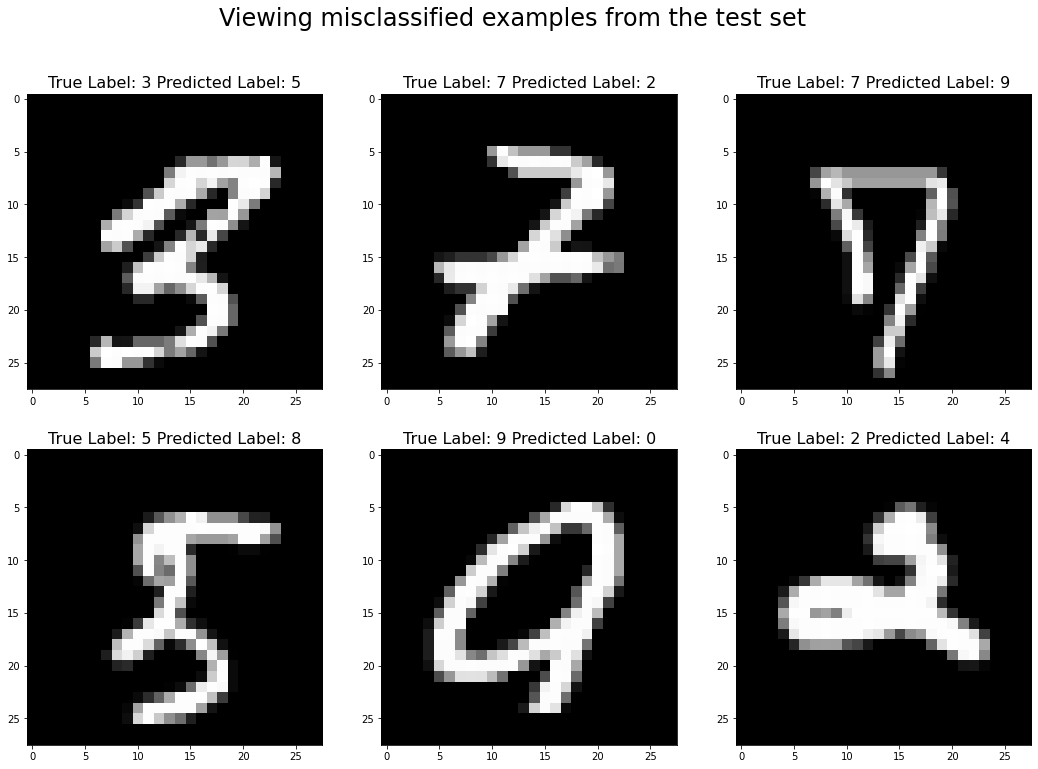

In [21]:
import random

model_predictions = model.predict(x_test).argmax(axis=1)

misclassified_examples = np.where(model_predictions != y_test)[0] # Since it returns a tuple containing an array.

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = random.choice(misclassified_examples)
        ax[i, j].imshow(x_test[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_test[index]} Predicted Label: {model_predictions[index]}', fontsize=16)

plt.suptitle('Viewing misclassified examples from the test set', fontsize=24)
plt.show()

<h1 style = "font-family: spantaran; font-size: 48px;"><span style = "color:#0ddc76">Saving </span>and <span style = "color:#0ddc76">Loading </span> Model</h1>

<p style = "font-family: Poppins; font-size: 18px;">◈ Tensorflow also has built-in modules that allow us to <span style = "text-decoration: skyblue solid underline">freeze</span> the model parameters and save them for future use.</p> 

In [22]:
# Saving and loading the model for future use:

from tensorflow.keras.models import load_model

model.save('MNIST_ANN.h5')

saved_model = load_model('MNIST_ANN.h5')

saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trai